In [1]:
import plotly
plotly.offline.init_notebook_mode()
import pandas as pd
import numpy as np 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
raw_data_url = 'https://raw.githubusercontent.com/andrewmejia600/MSDS7331/master/RAW_DATA/ml_clean_data.csv'

In [3]:
ml_data = pd.read_csv(raw_data_url)

In [4]:
ml_data.head(n=5)

age  fnlwght  education_num_yr  cap_gain  cap_loss  hours_per_week  \
0   39    77516                13      2174         0              40   
1   50    83311                13         0         0              13   
2   38   215646                 9         0         0              40   
3   53   234721                 7         0         0              40   
4   28   338409                13         0         0              40   

   income_outcome  workclass_Federal-gov  workclass_Local-gov  \
0               0                      0                    0   
1               0                      0                    0   
2               0                      0                    0   
3               0                      0                    0   
4               0                      0                    0   

   workclass_Private  ...  origin_descent_Asia  origin_descent_Carib  \
0                  0  ...                    0                     0   
1                  0  ...                    0                     0   
2                  1  ...                    0                     0   
3                  1  ...                    0                     0   
4                  1  ...                    0                     1   

   origin_descent_Central America  origin_descent_Europe  \
0                               0                      0   
1                               0                      0   
2                               0                      0   
3                               0                      0   
4                               0                      0   

   origin_descent_North America  origin_descent_South America  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   origin_descent_United States  age_range_adult  age_range_child  \
0                             1                1                0   
1                             1                1                0   
2                             1                1                0   
3                             1                1                0   
4                             0                1                0   

   age_range_senior  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 64 columns]

In [5]:
ml_data.dtypes

age                             int64
fnlwght                         int64
education_num_yr                int64
cap_gain                        int64
cap_loss                        int64
                                ...  
origin_descent_South America    int64
origin_descent_United States    int64
age_range_adult                 int64
age_range_child                 int64
age_range_senior                int64
Length: 64, dtype: object

In [6]:
ml_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 64 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   age                             30162 non-null  int64
 1   fnlwght                         30162 non-null  int64
 2   education_num_yr                30162 non-null  int64
 3   cap_gain                        30162 non-null  int64
 4   cap_loss                        30162 non-null  int64
 5   hours_per_week                  30162 non-null  int64
 6   income_outcome                  30162 non-null  int64
 7   workclass_Federal-gov           30162 non-null  int64
 8   workclass_Local-gov             30162 non-null  int64
 9   workclass_Private               30162 non-null  int64
 10  workclass_Self-emp-inc          30162 non-null  int64
 11  workclass_Self-emp-not-inc      30162 non-null  int64
 12  workclass_State-gov             30162 non-null  int64
 13  w

In [7]:
ml_df = ml_data.copy()

In [8]:
ml_df.shape

(30162, 64)

In [9]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
from sklearn.model_selection import ShuffleSplit
#https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


ML_std_clf = StandardScaler()
#removed some redundant dummy variables
if 'income_outcome' in ml_df:
    y = ml_df['income_outcome'].values 
    del ml_df['income_outcome'] 
    X = ml_df.values 
    

if 'level_of_employ_PT' in ml_df:
    del ml_df['level_of_employ_PT'] 
    X = ml_df.values 
    
if 'sex_Female' in ml_df:
    del ml_df['sex_Female'] 
    X = ml_df.values 
    
if 'origin_descent_us_0' in ml_df:
    del ml_df['origin_descent_us_0'] 
    X = ml_df.values 

if 'marital_stat_Unmarried' in ml_df:
    del ml_df['marital_stat_Unmarried'] 
    X = ml_df.values 






In [10]:
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In [11]:
ml_df.shape

(30162, 59)

====Iteration 0  ====

Accuracy:  0.8511519973479198 

f1_score: 0.6897028334485142 

precision_score: 0.756633813495072 

roc_auc_score: 0.7808227050353566 

Confusion Matrix: 

      0    1
0  4137  321
1   577  998 

Train Time:  0.6126302709999998 s

====Iteration 1  ====

Accuracy:  0.8528095474888115 

f1_score: 0.6674157303370787 

precision_score: 0.7226277372262774 

roc_auc_score: 0.7728146105081845 

Confusion Matrix: 

      0    1
0  4254  342
1   546  891 

Train Time:  1.1793295670000004 s

====Iteration 2  ====

Accuracy:  0.8546328526437925 

f1_score: 0.6800437796424662 

precision_score: 0.7408585055643879 

roc_auc_score: 0.7784037405615288 

Confusion Matrix: 

      0    1
0  4224  326
1   551  932 

Train Time:  1.1433468709999999 s



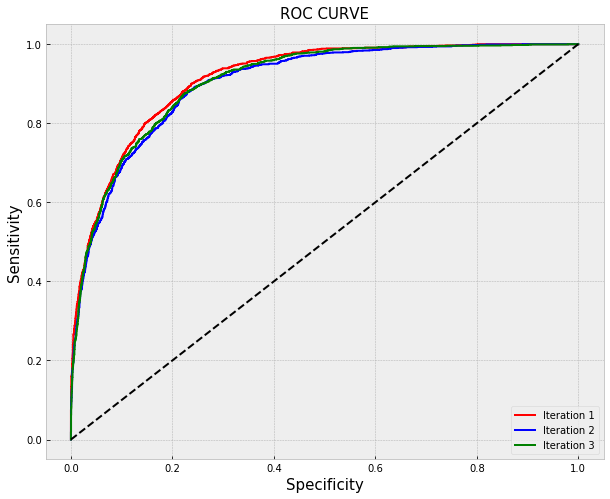

In [13]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
##https://docs.python.org/3/library/time.html#functions

from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.metrics import roc_auc_score, roc_curve

# Setting the parameters for the ROC Curve
plt.rcParams['figure.figsize'] = [10,8]
plt.style.use("bmh")

color = ['red', 'blue', 'green', 'fuchsia', 'cyan']
plt.title("ROC CURVE", fontsize = 15)
plt.xlabel("Specificity", fontsize = 15)
plt.ylabel("Sensitivity", fontsize = 15)


#lr_clf = LogisticRegression(penalty='elasticnet', C=1.0, class_weight=None, solver='saga', l1_ratio = 0.5 )
lr_clf = LogisticRegression(penalty='l2', C=0.5, class_weight=None, solver='liblinear')
lr_clf_pipe = make_pipeline(StandardScaler(),lr_clf)


iter_num=0
weights = []

for train_indices, test_indices in cv_object.split(X,y): 

    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    t = time.process_time()
    
    lr_clf_pipe.fit(X_train,y_train)
    y_hat = lr_clf_pipe.predict(X_test) # get test set precitions
    
    elapsed_time = time.process_time() - t
    

    # now let's get the accuracy and confusion matrix for these iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    f1_scor_ = mt.f1_score(y_test,y_hat)
    prec_scor_ = mt.precision_score(y_test, y_hat)
    auc_scor_ = mt.roc_auc_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("f1_score:", f1_scor_, "\n")
    print("precision_score:",prec_scor_ , "\n")
    print("roc_auc_score:",auc_scor_ , "\n")
    print("Confusion Matrix: \n")
    print (pd.DataFrame(conf),"\n")
    print("Train Time: ", elapsed_time,  "s\n")
    
    
    weights.append(lr_clf_pipe.named_steps['logisticregression'].coef_[0])

    
    
    prob = lr_clf_pipe.predict_proba(X_test)
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, prob_positive)
    plt.plot(fpr, tpr, color = color[iter_num])
  

    iter_num+=1
iterations = ["Iteration 1", "Iteration 2", "Iteration 3"]  
plt.gca().legend(iterations, loc = 'lower right', frameon = True)
plt.plot([0,1],[0,1], linestyle = '--', color = 'black')
plt.show()
weights = np.array(weights)

In [14]:
weights

array([[ 4.54080472e-01,  7.96846711e-02,  8.27999802e-01,
         2.27042409e+00,  2.54531120e-01,  2.49010263e-01,
         8.88286085e-02, -3.70445033e-02,  3.35260138e-02,
         5.90052474e-02, -7.91673644e-02, -3.78041971e-02,
        -1.11676340e-01, -2.37598427e-03, -8.14093415e-02,
        -1.24527862e-02,  2.43046746e-01, -1.78366362e-01,
        -1.40131784e-01, -1.00572030e-01, -2.66090809e-01,
        -2.12030040e-01,  1.60155717e-01,  9.54073775e-02,
         9.07740373e-02,  9.73461644e-02, -3.56260065e-02,
         4.99482211e-01, -2.01153994e-01, -9.93313781e-02,
        -5.61318461e-01, -1.43359321e-01,  4.95590819e-01,
         3.75465607e-01,  1.76076926e-02,  1.87731117e-01,
        -6.83907077e-02, -4.67569838e-02,  3.49138135e-02,
         3.20321021e-02, -3.71948405e-02,  9.40522078e-02,
         1.10669111e-02,  1.99624862e-01, -4.56647859e-02,
         3.92589546e-02, -3.06153640e-02, -4.46441190e-02,
         3.06117127e-02, -2.08264764e-02, -5.18660979e-0

In [15]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4

error_y=dict(
            type='data',
            array=np.std(weights,axis=0),
            visible=True
        )

graph1 = {'x': ml_df.columns,
          'y': np.mean(weights,axis=0),
    'error_y':error_y,
       'type': 'bar'}

fig = dict()
fig['data'] = [graph1]
fig['layout'] = {'title': 'Logistic Regression Weights, with error bars', 'height': 1000, 'width': 1400, 'font': {'size':14}}
plotly.offline.iplot(fig)

Let's select the important variables from above and look at education_num_yr, cap_gain, and the levels of marital status 

In [16]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
Xnew = ml_df[['age', 'education_num_yr', 'cap_gain', 'relationship_Husband', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife', 'sex_Male', 'age_range_adult', 'age_range_child', 'age_range_senior']].values

weights = []

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(Xnew,y)):
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    lr_clf_pipe.fit(Xnew[train_indices],y[train_indices])
    
    weights.append(lr_clf_pipe.named_steps['logisticregression'].coef_[0])
    iter_num =+1
    
weights = np.array(weights)

error_y=dict(
            type='data',
            array=np.std(weights,axis=0),
            visible=True
        )

graph1 = {'x': ['age', 'education_num_yr', 'cap_gain', 'relationship_Husband', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife', 'sex_Male', 'age_range_adult', 'age_range_child', 'age_range_senior'],
          'y': np.mean(weights,axis=0),
    'error_y':error_y,
       'type': 'bar'}

fig = dict()
fig['data'] = [graph1]
fig['layout'] = {'title': 'Logistic Regression Weights, with error bars', 'height': 1000, 'width': 1400, 'font': {'size':14}}

plotly.offline.iplot(fig)

====Iteration 0  ====

Accuracy:  0.8392176363334991 

f1_score: 0.6523297491039427 

precision_score: 0.7315112540192926 

roc_auc_score: 0.7570892597300638 

Confusion Matrix: 

      0    1
0  4153  334
1   636  910 

Train Time:  0.0985771720000006 s

====Iteration 1  ====

Accuracy:  0.8335819658544671 

f1_score: 0.6147352264006141 

precision_score: 0.7158176943699732 

roc_auc_score: 0.7343584270896235 

Confusion Matrix: 

      0    1
0  4228  318
1   686  801 

Train Time:  0.37804973799999964 s

====Iteration 2  ====

Accuracy:  0.8398806563898558 

f1_score: 0.6408921933085502 

precision_score: 0.7249789739276703 

roc_auc_score: 0.7510651181060228 

Confusion Matrix: 

      0    1
0  4205  327
1   639  862 

Train Time:  0.3684633640000001 s



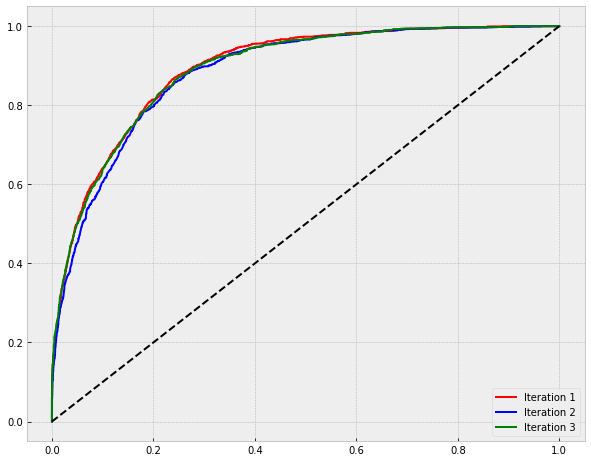

In [17]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(Xnew,y)):
    
    
    t = time.process_time()
    lr_clf_pipe.fit(Xnew[train_indices],y[train_indices])
    
    y_hat = lr_clf_pipe.predict(Xnew[test_indices])
    
    elapsed_time = time.process_time() - t
    


    acc = mt.accuracy_score(y[test_indices],y_hat)
    conf = mt.confusion_matrix(y[test_indices],y_hat)
    f1_scor_ = mt.f1_score(y[test_indices],y_hat)
    prec_scor_ = mt.precision_score(y[test_indices], y_hat)
    auc_scor_ = mt.roc_auc_score(y[test_indices],y_hat)
    conf = mt.confusion_matrix(y[test_indices],y_hat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("f1_score:", f1_scor_, "\n")
    print("precision_score:",prec_scor_ , "\n")
    print("roc_auc_score:",auc_scor_ , "\n")
    print("Confusion Matrix: \n")
    print (pd.DataFrame(conf),"\n")
    print("Train Time: ", elapsed_time,  "s\n")
    
    prob = lr_clf_pipe.predict_proba(Xnew[test_indices])
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(y[test_indices], prob_positive)
    plt.plot(fpr, tpr, color = color[iter_num])
  

    iter_num+=1
iterations = ["Iteration 1", "Iteration 2", "Iteration 3"]  
plt.gca().legend(iterations, loc = 'lower right', frameon = True)
plt.plot([0,1],[0,1], linestyle = '--', color = 'black')
plt.show()
    

In [18]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4


from sklearn.svm import SVC


svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto')

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    ML_std_clf.fit(X_train)
    X_train_scaled = ML_std_clf.transform(X_train) 
    X_test_scaled = ML_std_clf.transform(X_test) 
    
    t = time.process_time()
    svm_clf.fit(X_train_scaled, y_train)  # train object

    y_hat = svm_clf.predict(X_test_scaled) # get test set precitions
    
    elapsed_time = time.process_time() - t
    
    acc = mt.accuracy_score(y_test,y_hat)
    f1_scor_ = mt.f1_score(y_test,y_hat)
    prec_scor_ = mt.precision_score(y_test, y_hat)
    auc_scor_ = mt.roc_auc_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("f1_score:", f1_scor_, "\n")
    print("precision_score:",prec_scor_ , "\n")
    print("roc_auc_score:",auc_scor_ , "\n")
    print("Confusion Matrix: \n")
    print (pd.DataFrame(conf),"\n")
    print("Train Time: ", elapsed_time,  "s\n")
    
    iter_num += 1
    
    

====Iteration 0  ====

Accuracy:  0.8491629371788496 

f1_score: 0.6622123236822568 

precision_score: 0.7623931623931623 

roc_auc_score: 0.7618236842151219 

Confusion Matrix: 

      0    1
0  4231  278
1   632  892 

Train Time:  34.221247063 s

====Iteration 1  ====

Accuracy:  0.8531410575169899 

f1_score: 0.6666666666666666 

precision_score: 0.7618228718830611 

roc_auc_score: 0.7658010173473795 

Confusion Matrix: 

      0    1
0  4261  277
1   609  886 

Train Time:  34.01177787699999 s

====Iteration 2  ====

Accuracy:  0.852312282446544 

f1_score: 0.6686500557828189 

precision_score: 0.749791492910759 

roc_auc_score: 0.7686600227209942 

Confusion Matrix: 

      0    1
0  4243  300
1   591  899 

Train Time:  33.855953262 s



In [19]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
for (train_indices, test_indices) in cv_object.split(X,y): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    ML_std_clf.fit(X_train)
    X_train_scaled = ML_std_clf.transform(X_train) 
    X_test_scaled = ML_std_clf.transform(X_test) 

In [20]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
#https://docs.python.org/3/library/time.html#functions




# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC

# train the model just as before
svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto') # get object
t = time.process_time()
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

elapsed_time = time.process_time() - t


acc = mt.accuracy_score(y_test,y_hat)
f1_scor_ = mt.f1_score(y_test,y_hat)
prec_scor_ = mt.precision_score(y_test, y_hat)
auc_scor_ = mt.roc_auc_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)


print("Accuracy: ", acc, "\n" )
print("f1_score:", f1_scor_, "\n")
print("precision_score:",prec_scor_ , "\n")
print("roc_auc_score:",auc_scor_ , "\n")
print("Confusion Matrix: \n")
print (pd.DataFrame(conf),"\n")
print("Train Time: ", elapsed_time,  "s\n")





Accuracy:  0.8528095474888115 

f1_score: 0.6770909090909091 

precision_score: 0.7726141078838175 

roc_auc_score: 0.7707686516795598 

Confusion Matrix: 

      0    1
0  4214  274
1   614  931 

Train Time:  35.270304143999994 s



In [21]:
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(8466, 59)
(8466,)
[4247 4219]


[[ 2.24572477e-01  5.29421688e-02  6.49743041e-01  1.80391259e+00
   1.75445500e-01  1.18854397e-01  5.06519734e-02 -7.10539628e-03
   2.61984702e-02  4.39035109e-02 -7.00393862e-02 -3.60168146e-02
  -2.02934231e-03 -3.48067036e-02 -7.02848932e-03 -7.54684773e-02
   2.05707726e-01 -1.10299012e-01 -7.24404429e-02 -8.23152538e-02
  -1.45215713e-01 -8.78362455e-02  1.40009409e-01  3.70713582e-02
   5.28242976e-02  9.25760238e-02 -5.48393777e-02  3.56462017e-01
  -2.15729400e-01 -6.89034854e-02 -2.46772479e-01 -1.32408024e-01
   2.74115919e-01  1.48743891e-01 -1.03716154e-02  1.18347009e-01
  -6.07897997e-02 -9.68180196e-04  8.38701976e-02 -1.58554722e-02
  -3.79478779e-02  1.48985416e-01 -3.94239760e-02  1.65336258e-01
  -4.03570845e-02  1.39593276e-02 -2.41501717e-03 -2.75903961e-02
   1.33240964e-02 -3.79467547e-02 -1.75948494e-02 -3.11914653e-02
  -3.41555890e-03 -4.77111155e-02 -2.30525111e-02 -1.03716154e-02
   7.17391911e-02  0.00000000e+00 -8.40737468e-02]]


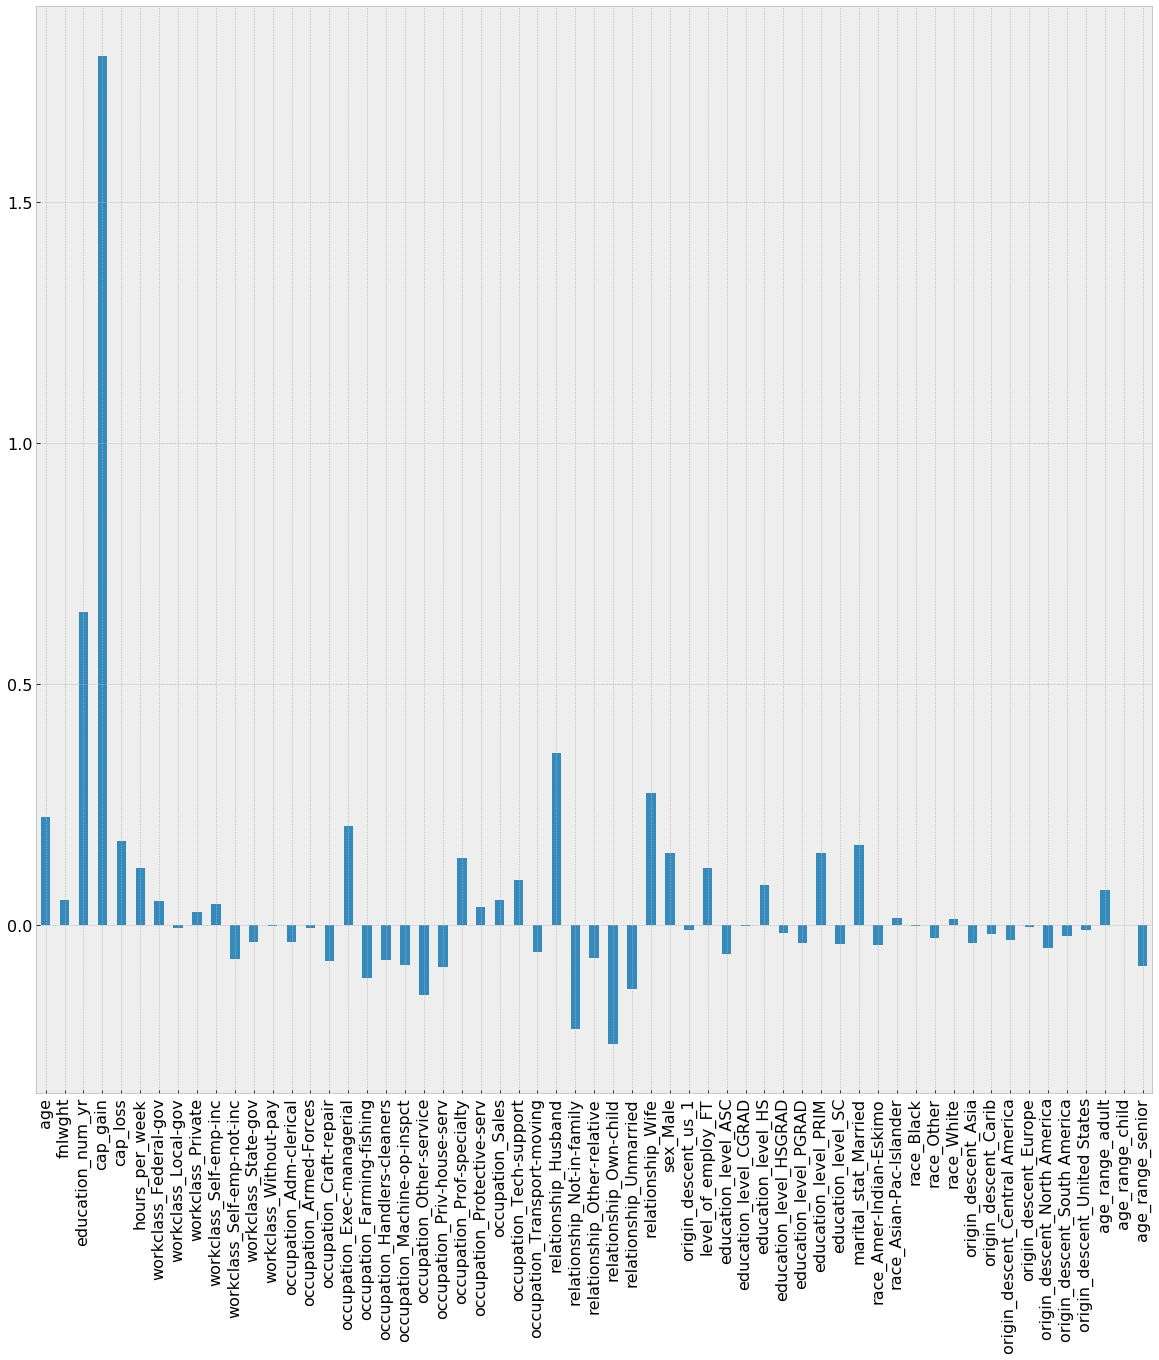

In [22]:
print(svm_clf.coef_)
weights = pd.Series(svm_clf.coef_[0],index=ml_df.columns)
weights.plot(kind='bar',figsize=(20,20), fontsize=16)

In [23]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4

df_tested_on = ml_df.iloc[train_indices].copy() # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:].copy()

df_support['income_outcome'] = y[svm_clf.support_] # add back in the income_outcomw Column to the pandas support vectors dataframe
ml_df['income_outcome'] = y # also add it back in for the original data
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8466 entries, 3948 to 18344
Data columns (total 60 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   age                             8466 non-null   int64
 1   fnlwght                         8466 non-null   int64
 2   education_num_yr                8466 non-null   int64
 3   cap_gain                        8466 non-null   int64
 4   cap_loss                        8466 non-null   int64
 5   hours_per_week                  8466 non-null   int64
 6   workclass_Federal-gov           8466 non-null   int64
 7   workclass_Local-gov             8466 non-null   int64
 8   workclass_Private               8466 non-null   int64
 9   workclass_Self-emp-inc          8466 non-null   int64
 10  workclass_Self-emp-not-inc      8466 non-null   int64
 11  workclass_State-gov             8466 non-null   int64
 12  workclass_Without-pay           8466 non-null   int64
 13 

/home/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/home/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 720x288 with 0 Axes>

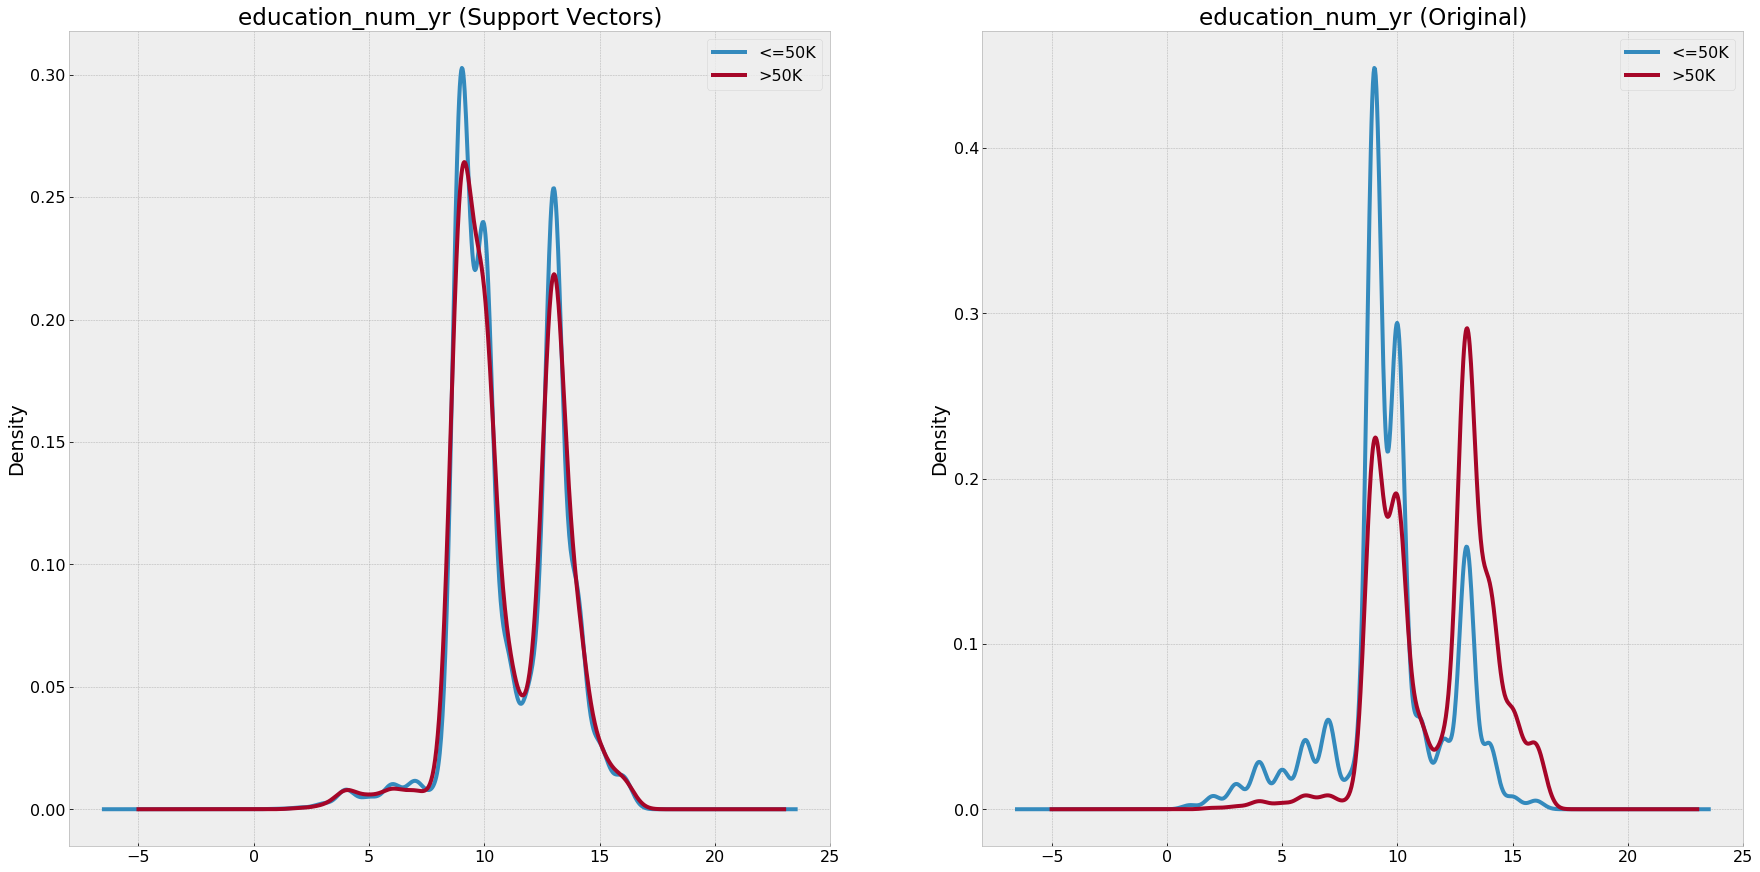

<Figure size 720x288 with 0 Axes>

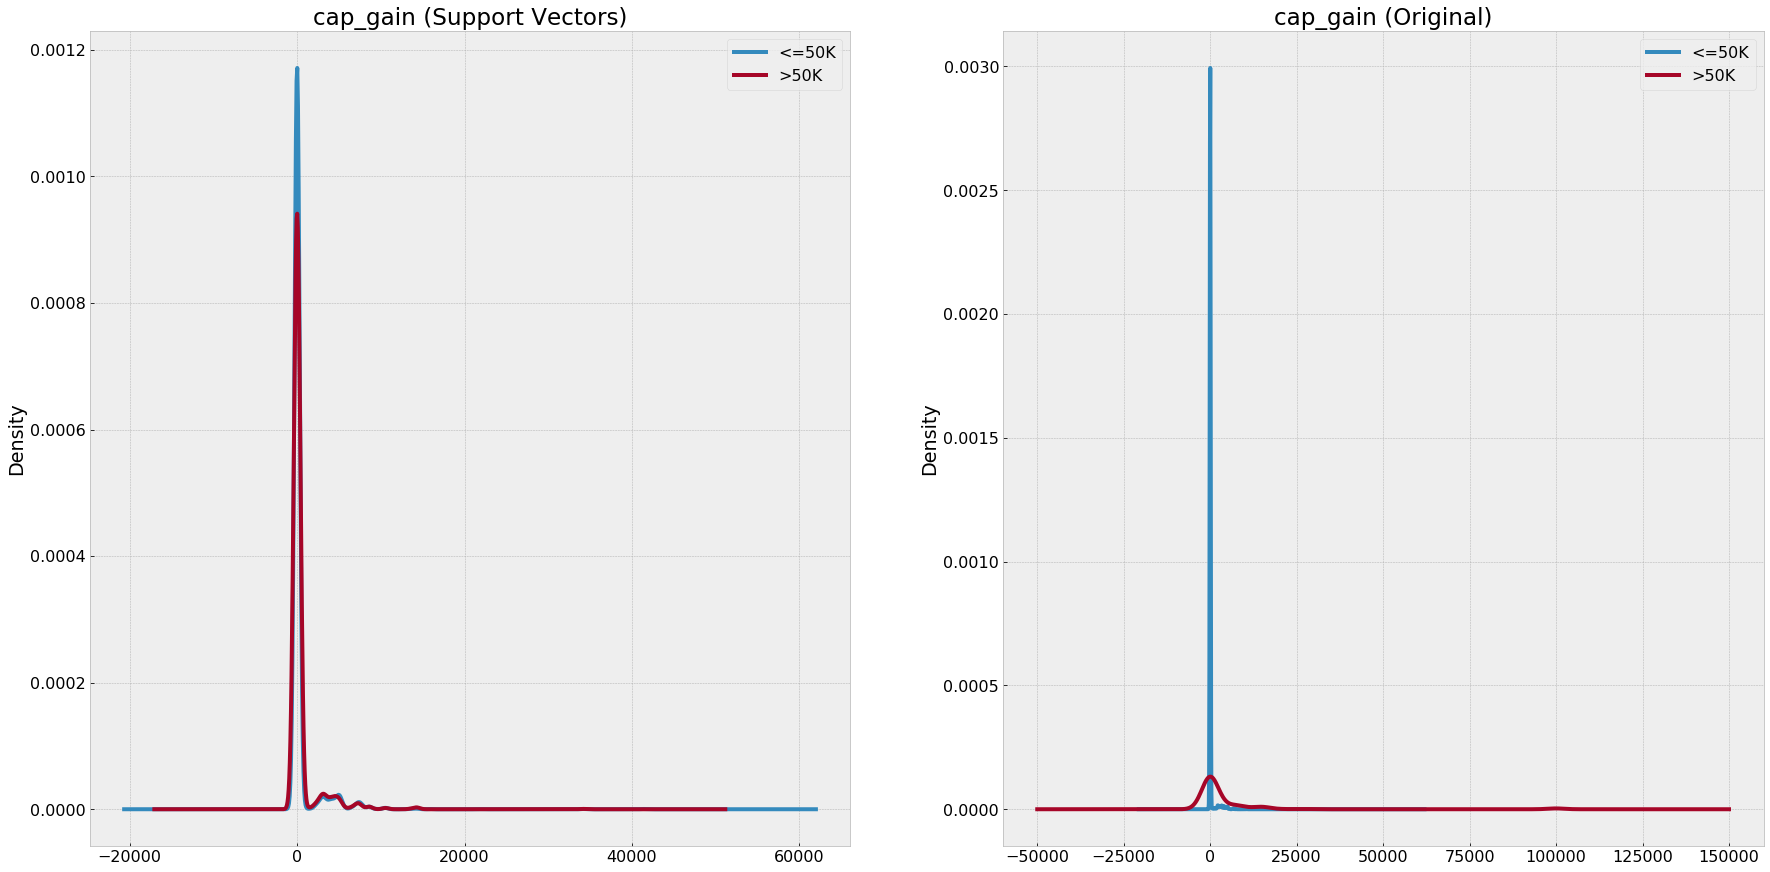

<Figure size 720x288 with 0 Axes>

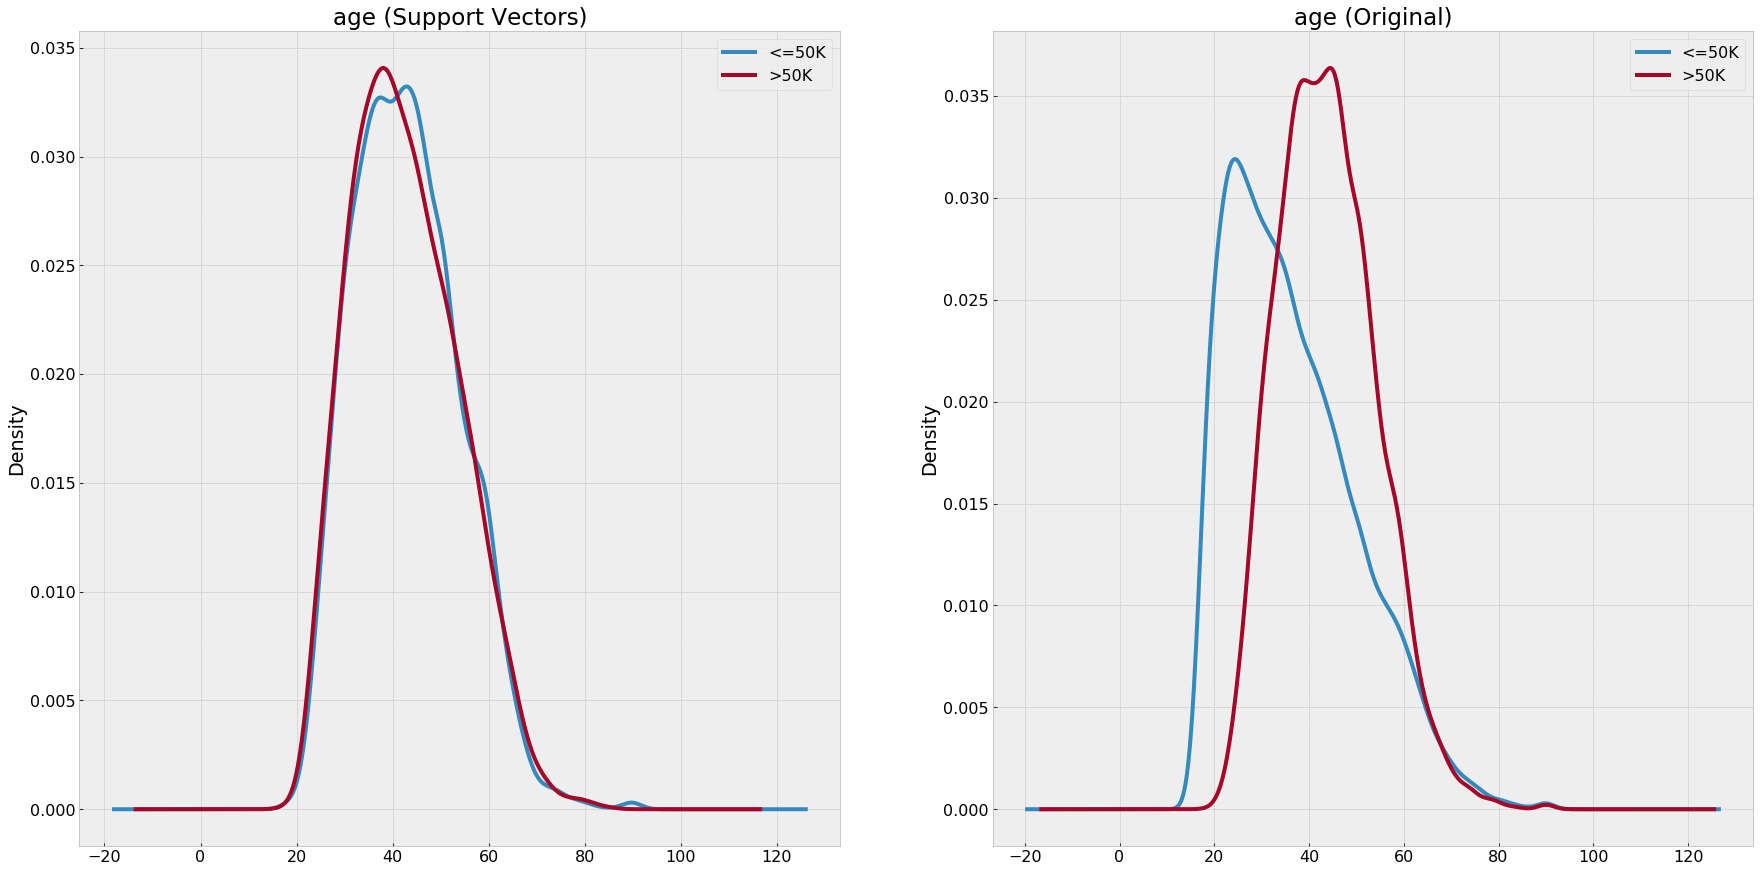

<Figure size 720x288 with 0 Axes>

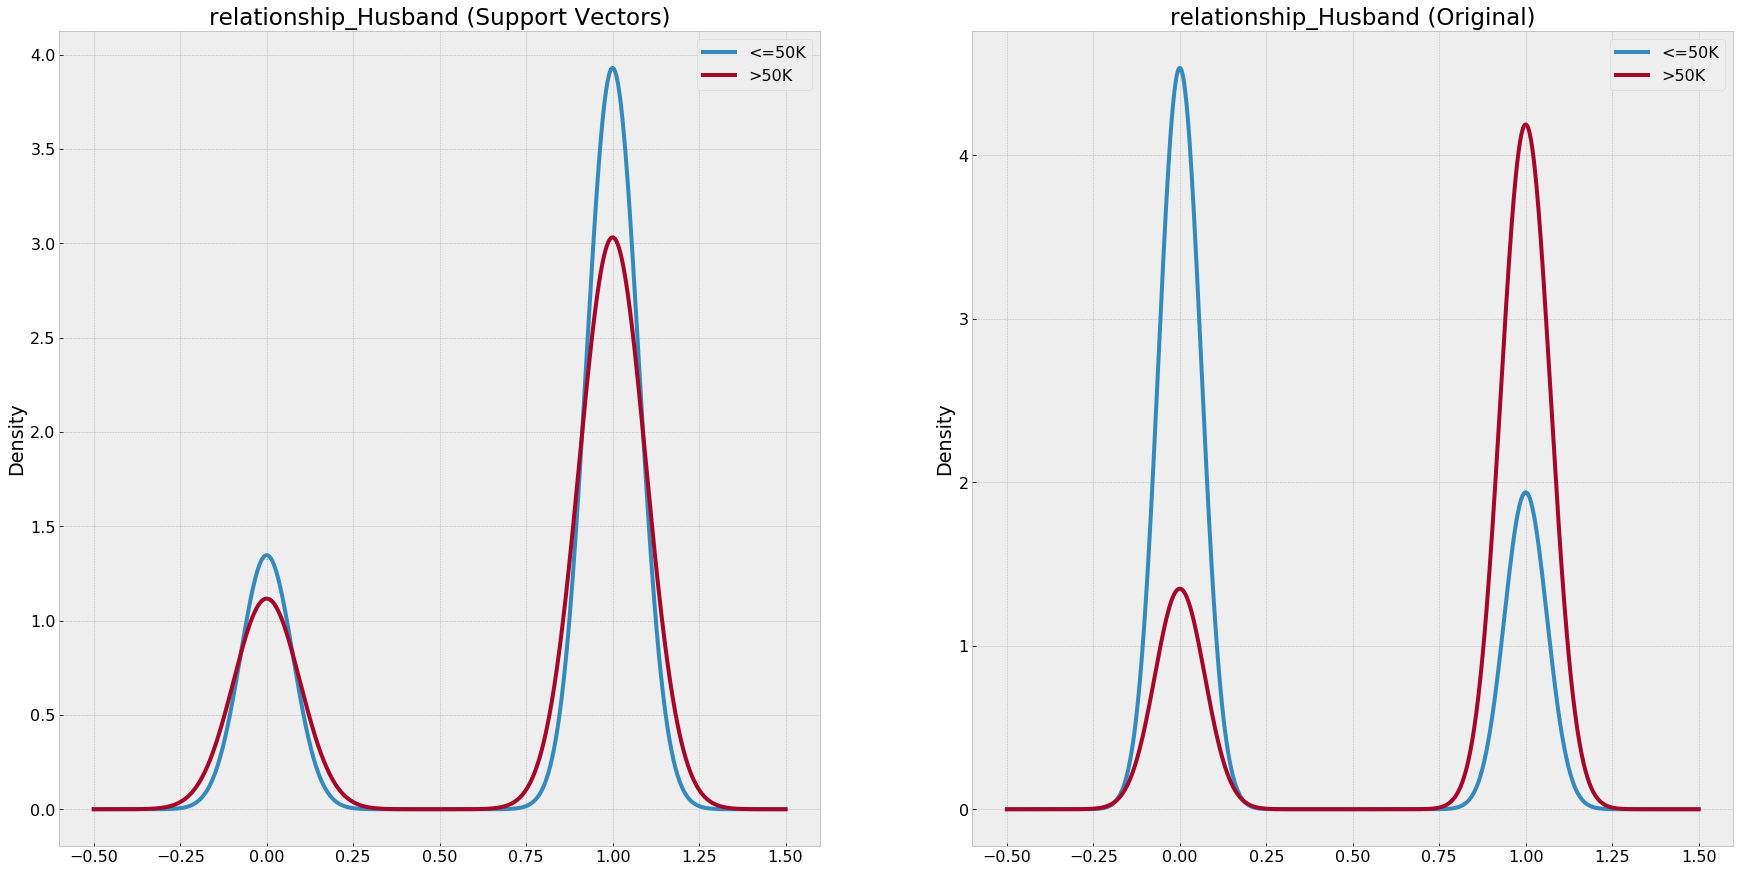

<Figure size 720x288 with 0 Axes>

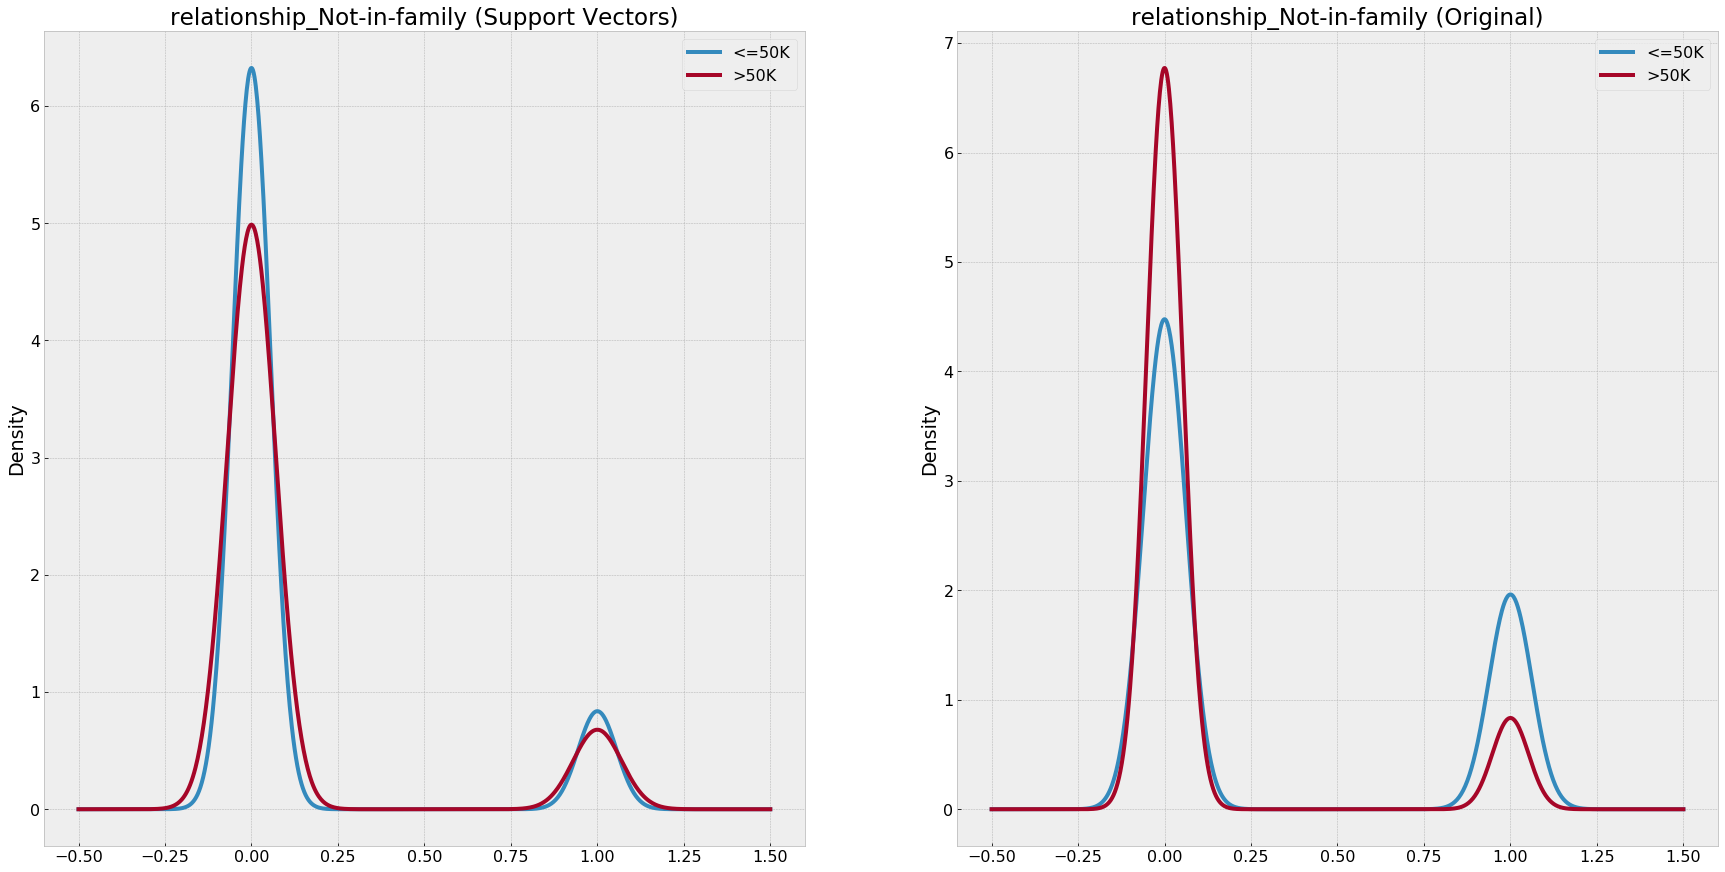

<Figure size 720x288 with 0 Axes>

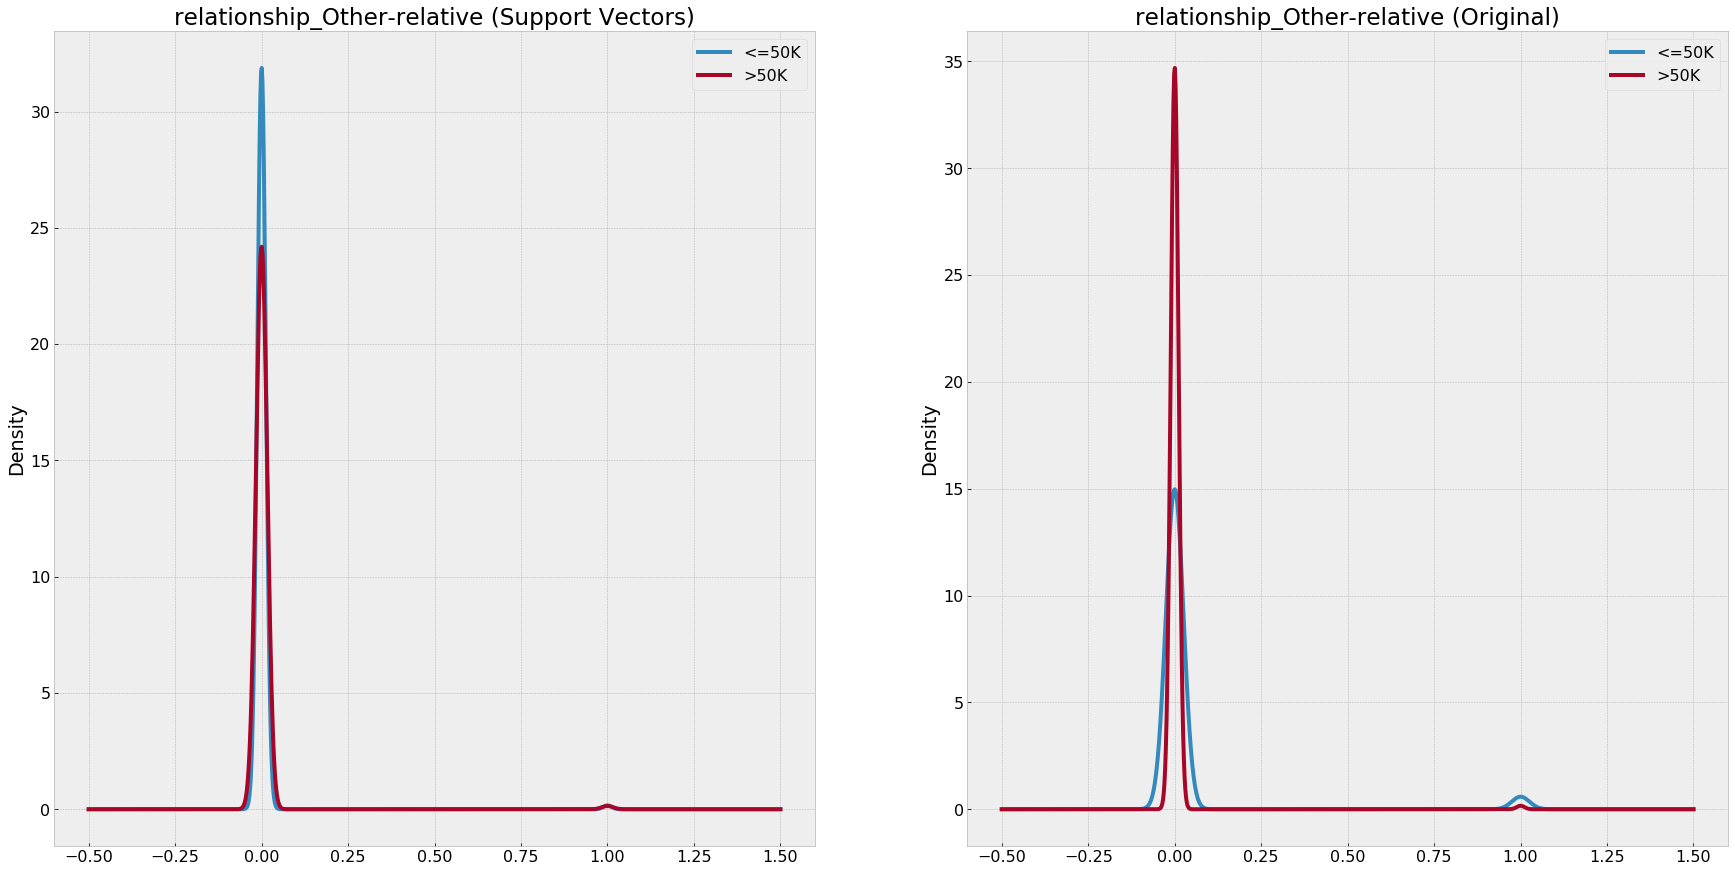

<Figure size 720x288 with 0 Axes>

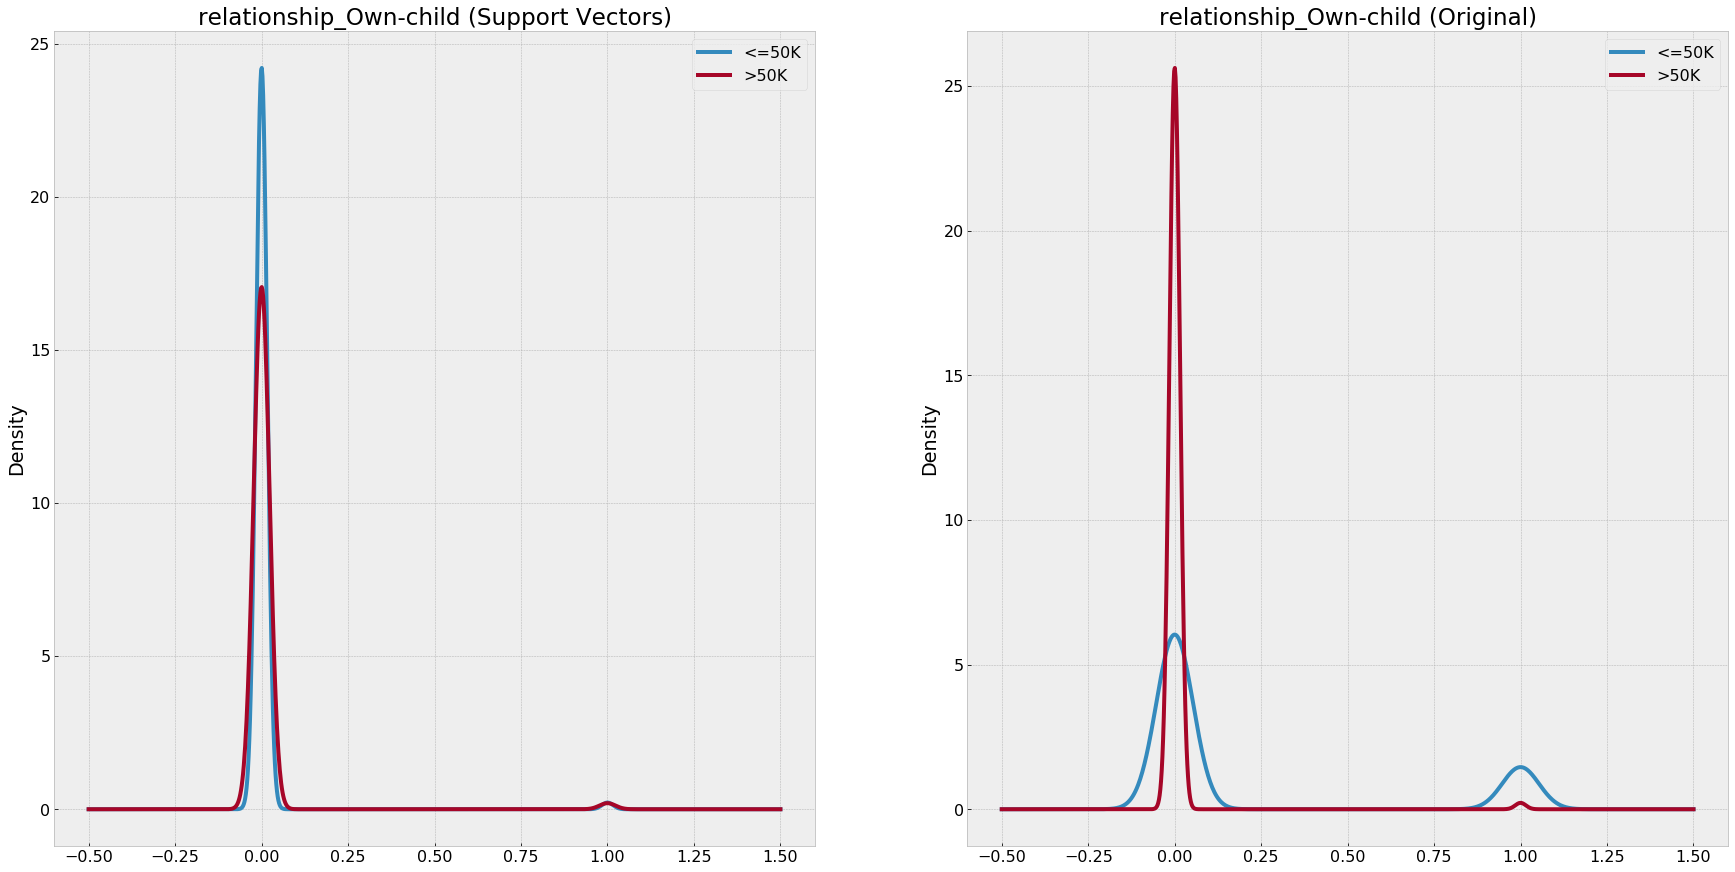

<Figure size 720x288 with 0 Axes>

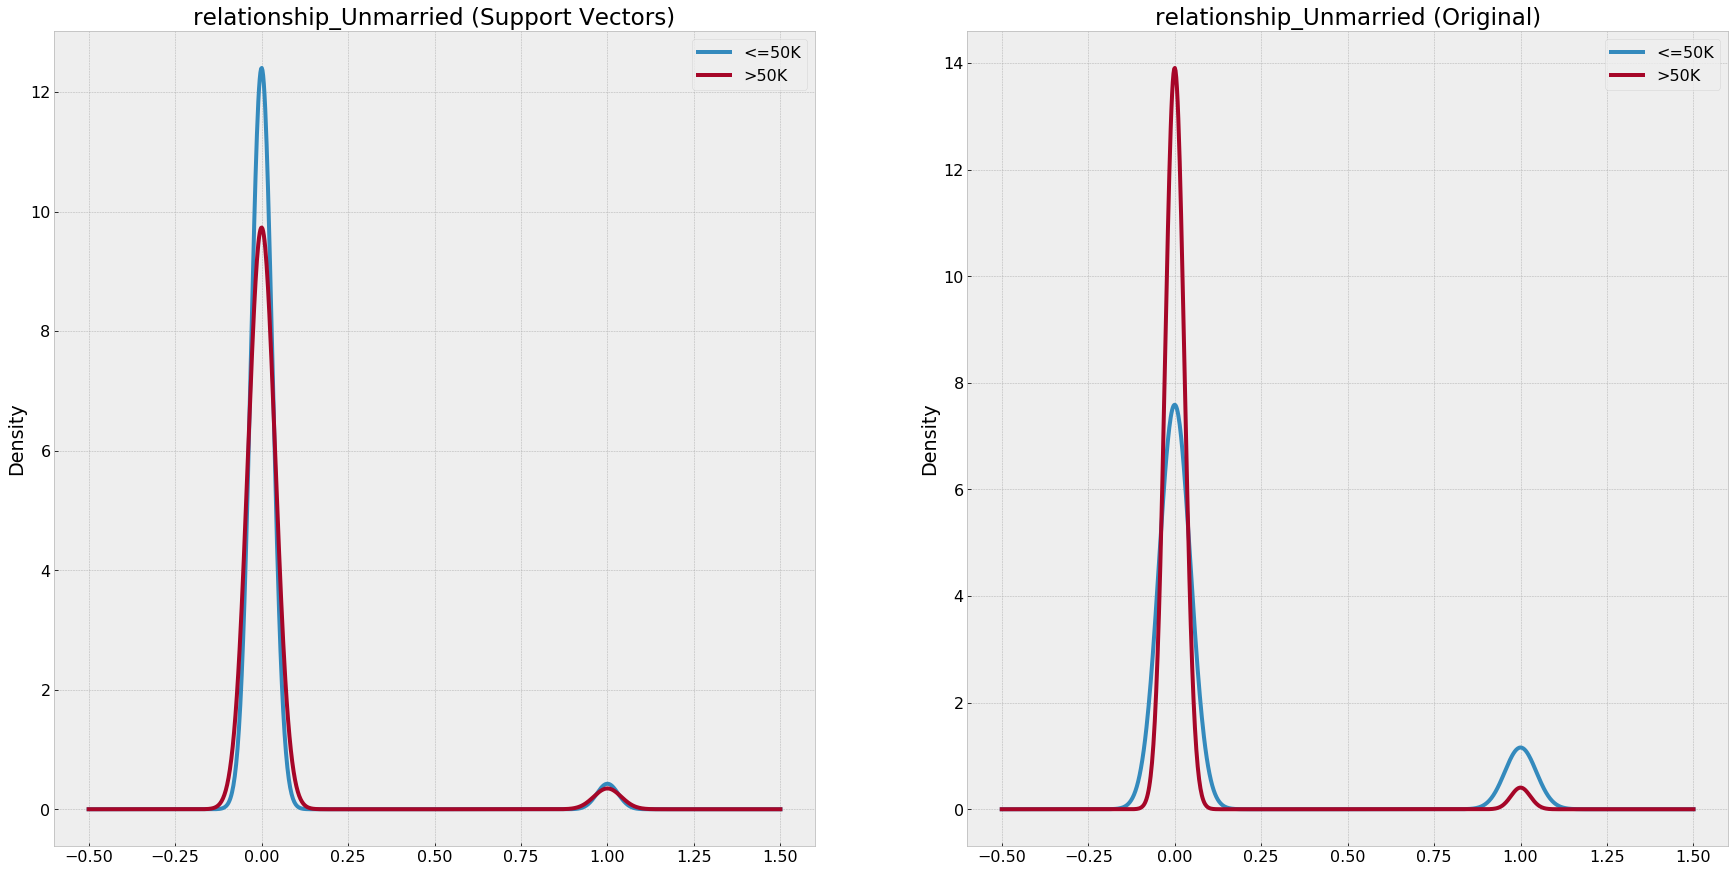

<Figure size 720x288 with 0 Axes>

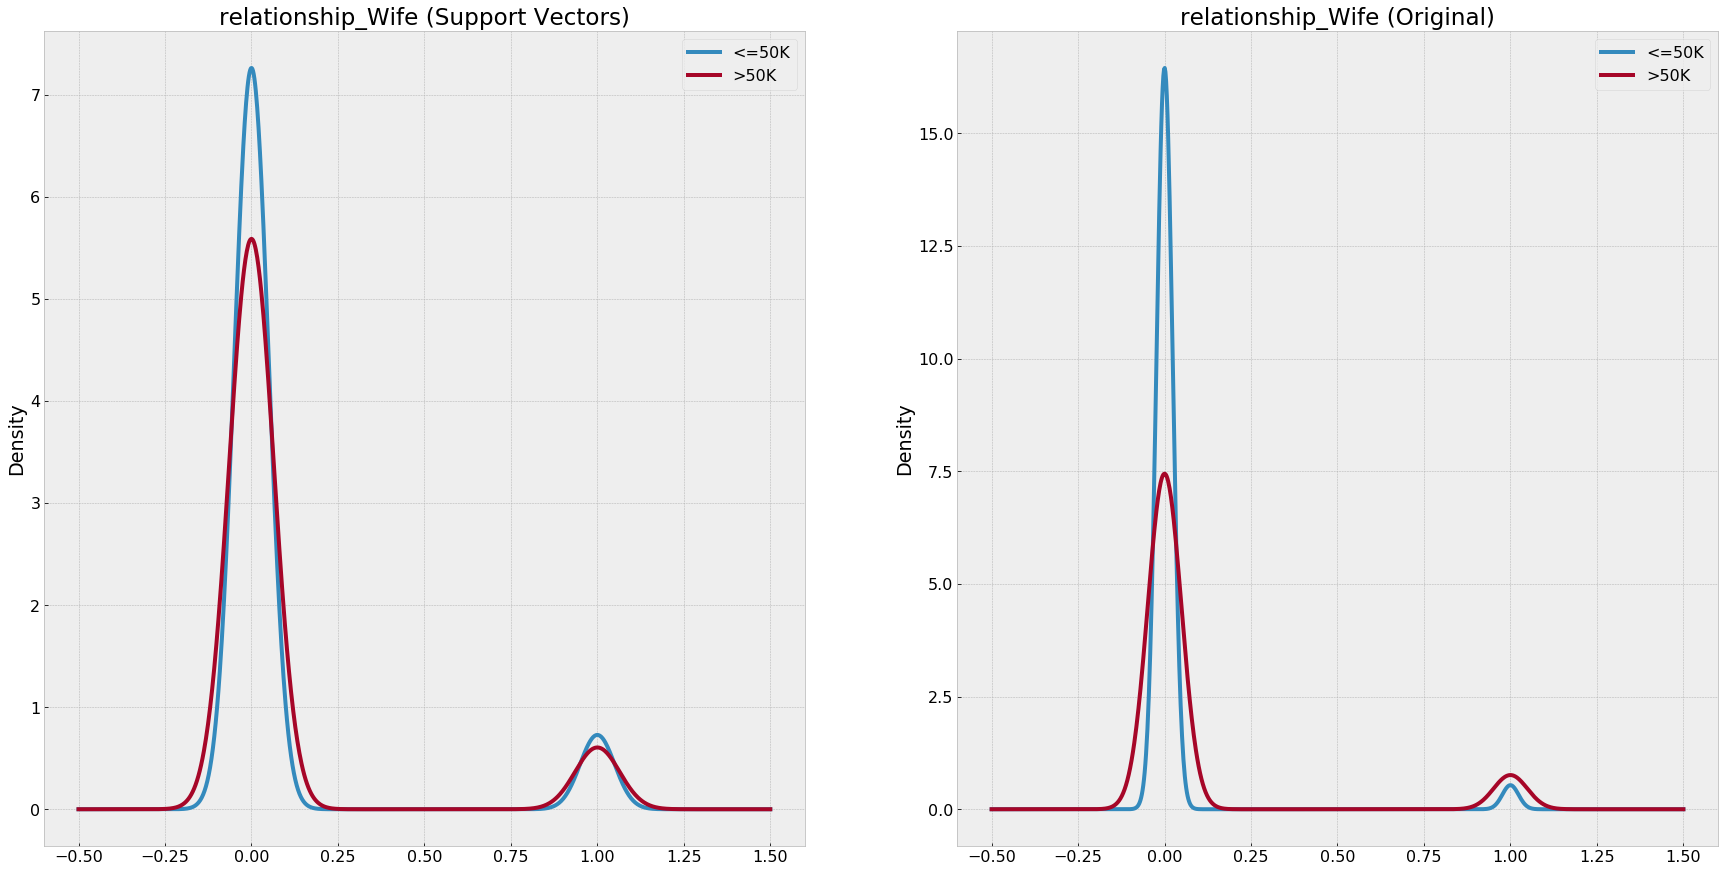

<Figure size 720x288 with 0 Axes>

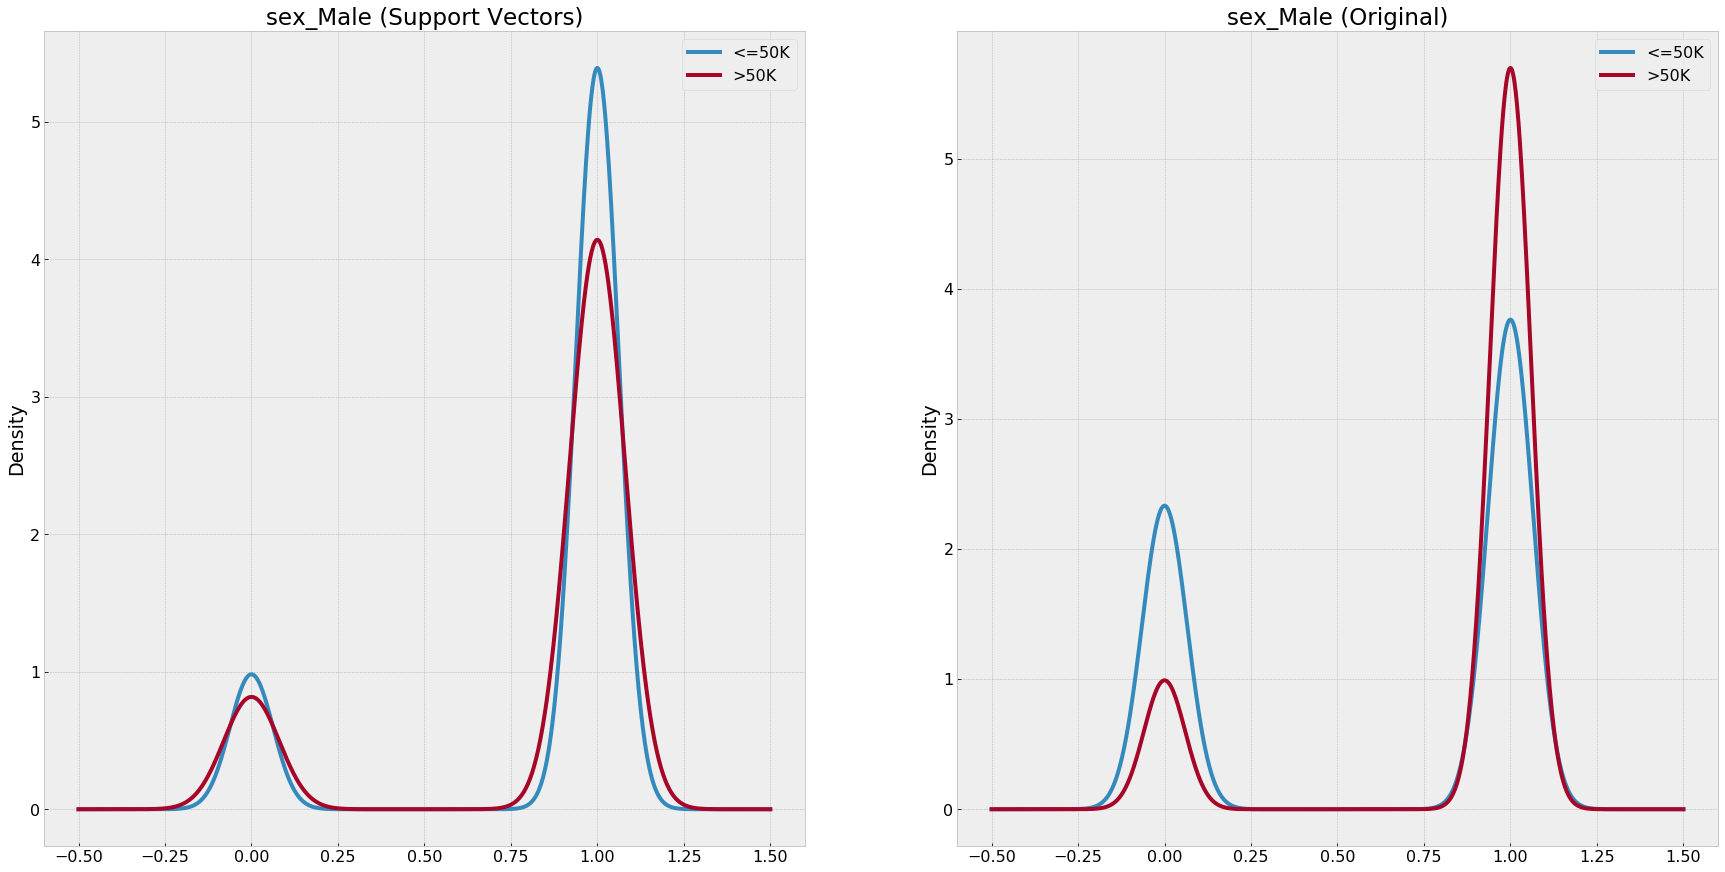

<Figure size 720x288 with 0 Axes>

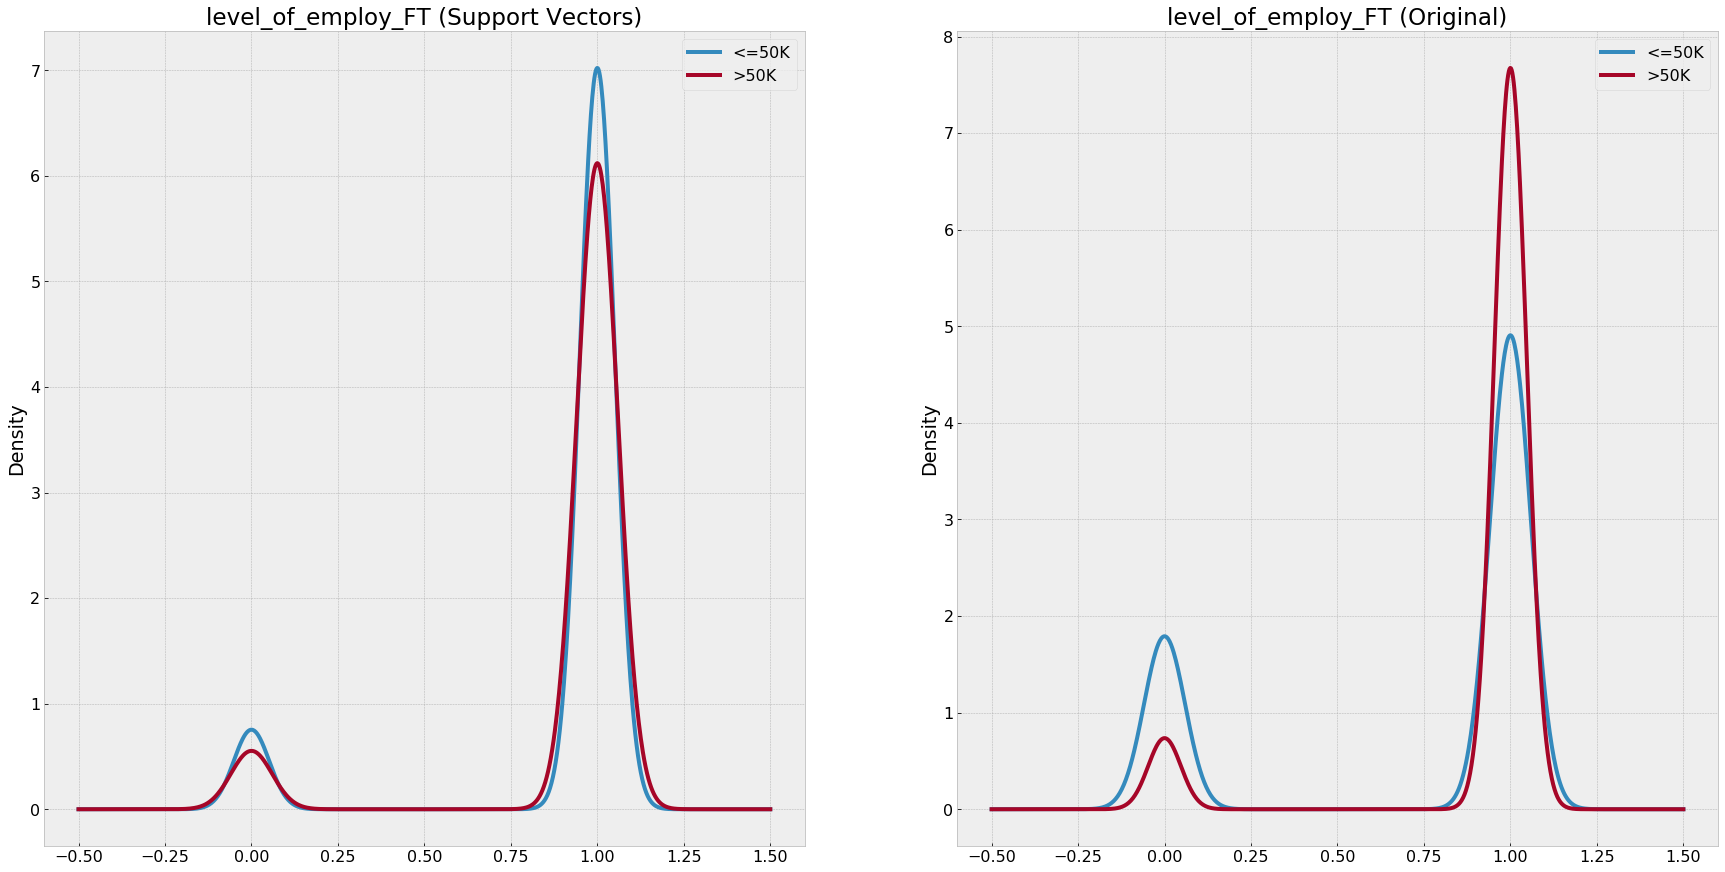

In [24]:
#https://matplotlib.org/api/matplotlib_configuration_api.html#matplotlib.rc
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4

from pandas.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['income_outcome'])
df_grouped = ml_df.groupby(['income_outcome'])

# plot KDE of Different variables
vars_to_plot = ['education_num_yr', 'cap_gain', 'age', 'relationship_Husband', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife', 'sex_Male', 'level_of_employ_FT']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    plt.figure(figsize=(30,15))
    plt.rcParams.update({'font.size': 16,'lines.linewidth':4})
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['<=50K','>50K'])
    plt.title(v+' (Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['<=50K','>50K'])
    plt.title(v+' (Original)')

In [25]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
#https://docs.python.org/3/library/time.html#functions


svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') 
#svm_clf = SVC(C=10, kernel='rbf', gamma=10) #terrible scores and long compute times

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    ML_std_clf.fit(X_train)
    X_train_scaled = ML_std_clf.transform(X_train) 
    X_test_scaled = ML_std_clf.transform(X_test) 
    
    t = time.process_time()

    svm_clf.fit(X_train_scaled, y_train)  

    y_hat = svm_clf.predict(X_test_scaled)
    
    elapsed_time = time.process_time() - t

    acc = mt.accuracy_score(y_test,y_hat)
    f1_scor_ = mt.f1_score(y_test,y_hat)
    prec_scor_ = mt.precision_score(y_test, y_hat)
    auc_scor_ = mt.roc_auc_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("f1_score:", f1_scor_, "\n")
    print("precision_score:",prec_scor_ , "\n")
    print("roc_auc_score:",auc_scor_ , "\n")
    print("Confusion Matrix: \n")
    print (pd.DataFrame(conf),"\n")
    print("Train Time: ", elapsed_time,  "s\n")
    
    iter_num =+1
    
    

====Iteration 0  ====

Accuracy:  0.846676611967512 

f1_score: 0.6470812666921023 

precision_score: 0.7348353552859619 

roc_auc_score: 0.7555166801476549 

Confusion Matrix: 

      0    1
0  4260  306
1   619  848 

Train Time:  35.59935047800002 s

====Iteration 1  ====

Accuracy:  0.8499917122492956 

f1_score: 0.6525911708253359 

precision_score: 0.7515473032714411 

roc_auc_score: 0.7575129100355569 

Confusion Matrix: 

      0    1
0  4278  281
1   624  850 

Train Time:  35.18580163600001 s

====Iteration 2  ====

Accuracy:  0.8430300016575502 

f1_score: 0.6381352693924341 

precision_score: 0.7468694096601073 

roc_auc_score: 0.7473103668877324 

Confusion Matrix: 

      0    1
0  4251  283
1   664  835 

Train Time:  35.61405294099998 s



In [26]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4
from sklearn.linear_model import SGDClassifier

regularize_const = 0.1
iterations = 5
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', n_iter_no_change=iterations, n_jobs=-1, penalty='l2')

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    ML_std_clf.fit(X_train)
    X_train_scaled = ML_std_clf.transform(X_train) 
    X_test_scaled = ML_std_clf.transform(X_test) 

    t = time.process_time()
    
    svm_sgd.fit(X_train_scaled,y_train)
    yhat = svm_sgd.predict(X_test_scaled)
    
    elapsed_time = time.process_time() - t
    
    acc = mt.accuracy_score(y_test,yhat)
    f1_scor_ = mt.f1_score(y_test,yhat)
    prec_scor_ = mt.precision_score(y_test, yhat)
    auc_scor_ = mt.roc_auc_score(y_test,yhat)
    conf = mt.confusion_matrix(y_test,yhat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("f1_score:", f1_scor_, "\n")
    print("precision_score:",prec_scor_ , "\n")
    print("roc_auc_score:",auc_scor_ , "\n")
    print("Confusion Matrix: \n")
    print (pd.DataFrame(conf),"\n")
    print("Train Time: ", elapsed_time,  "s\n")
    
    iter_num =+1

====Iteration 0  ====

Accuracy:  0.8357367810376264 

f1_score: 0.6142467886337097 

precision_score: 0.7521448999046711 

roc_auc_score: 0.7307338011825486 

Confusion Matrix: 

      0    1
0  4253  260
1   731  789 

Train Time:  0.04849106500000744 s

====Iteration 1  ====

Accuracy:  0.8431957566716393 

f1_score: 0.6182405165456012 

precision_score: 0.7502448579823702 

roc_auc_score: 0.7350061464787786 

Confusion Matrix: 

      0    1
0  4321  255
1   691  766 

Train Time:  0.1847055320000095 s

====Iteration 2  ====

Accuracy:  0.8378915962207857 

f1_score: 0.6140489344909235 

precision_score: 0.7546071774975752 

roc_auc_score: 0.7308907571171123 

Confusion Matrix: 

      0    1
0  4277  253
1   725  778 

Train Time:  0.16349614899996823 s



In [27]:
#https://github.com/jakemdrew/DataMiningNotebooks notebook 4


log_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='log', n_iter_no_change=iterations, n_jobs=-1, penalty='l2')

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)): 
    
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    ML_std_clf.fit(X_train)
    X_train_scaled = ML_std_clf.transform(X_train) 
    X_test_scaled = ML_std_clf.transform(X_test) 
    
    t = time.process_time()

    log_sgd.fit(X_train_scaled,y_train)
    yhat = log_sgd.predict(X_test_scaled)
    
    elapsed_time = time.process_time() - t
    
    acc = mt.accuracy_score(y_test,yhat)
    f1_scor_ = mt.f1_score(y_test,yhat)
    prec_scor_ = mt.precision_score(y_test, yhat)
    auc_scor_ = mt.roc_auc_score(y_test,yhat)
    conf = mt.confusion_matrix(y_test,yhat)
    print("====Iteration",iter_num," ====\n")

    print("Accuracy: ", acc, "\n" )
    print("f1_score:", f1_scor_, "\n")
    print("precision_score:",prec_scor_ , "\n")
    print("roc_auc_score:",auc_scor_ , "\n")
    print("Confusion Matrix: \n")
    print (pd.DataFrame(conf),"\n")
    print("Train Time: ", elapsed_time,  "s\n")
    
    iter_num =+1

====Iteration 0  ====

Accuracy:  0.834410740924913 

f1_score: 0.5907414993854977 

precision_score: 0.7645811240721103 

roc_auc_score: 0.7161779101278736 

Confusion Matrix: 

      0    1
0  4313  222
1   777  721 

Train Time:  0.07145821700004262 s

====Iteration 1  ====

Accuracy:  0.8292723354881485 

f1_score: 0.5893141945773525 

precision_score: 0.7563971340839304 

roc_auc_score: 0.7149128292208325 

Confusion Matrix: 

      0    1
0  4264  238
1   792  739 

Train Time:  0.24128614099998913 s

====Iteration 2  ====

Accuracy:  0.8247969501077408 

f1_score: 0.5630425795783381 

precision_score: 0.7625979843225084 

roc_auc_score: 0.6996134017245926 

Confusion Matrix: 

      0    1
0  4295  212
1   845  681 

Train Time:  0.23101360399999749 s



Rubric Sections

https://www.datasciencecentral.com/profiles/blogs/crisp-dm-a-standard-methodology-to-ensure-a-good-outcome
Create Models: 

50 PTS 

Create a logistic regression model and a support vector machine model for the classification task involved with your dataset. Assess how well each model performs (use 80/20 training/testing split for your data). Adjust parameters of the models to make them more accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use. That is, the SGDClassifier is fine to use for optimizing logistic regression and linear support vector machines. For many problems, SGD will be required in order to train the SVM model in a reasonable timeframe. 

Model Advantages: 

10 PTS 

Discuss the advantages of each model for each classification task. Does one type of model offer superior performance over another in terms of prediction accuracy? In terms of training time or efficiency? Explain in detail.

Interpret Feature Importance: 

30 PTS 

Use the weights from logistic regression to interpret the importance of different features for the classification task. Explain your interpretation in detail. Why do you think some variables are more important?

Interpret Support Vectors: 

10 PTS 

Look at the chosen support vectors for the classification task. Do these provide any insight into the data? Explain. If you used stochastic gradient descent (and therefore did not explicitly solve for support vectors), try subsampling your data to train the SVC model— then analyze the support vectors from the subsampled dataset.